# Step 0 - Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1 - Read the data

In [ ]:
from google.colab import files          #Upload 04 decisiontreeAdultIncome.csv from the "Classification" folder of the course 
uploaded = files.upload()

Saving 04 - decisiontreeAdultIncome.csv to 04 - decisiontreeAdultIncome.csv


In [ ]:
data = pd.read_csv('04 - decisiontreeAdultIncome.csv')
data.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K


# Step 2 - Prelim Analysis and Feature selection


In [ ]:
data.shape

(19787, 8)

##Null Values

In [ ]:
data.isnull().sum()

age               0
wc                0
education         0
marital status    0
race              0
gender            0
hours per week    0
IncomeClass       0
dtype: int64

## Create Dummy Variables and drop first to avoid dummy variables trap

In [ ]:
data.dtypes

age                int64
wc                object
education         object
marital status    object
race              object
gender            object
hours per week     int64
IncomeClass       object
dtype: object

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,hours per week,wc_ Local-gov,wc_ Never-worked,wc_ Private,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital status_ Never-married,marital status_ Widowed,marital status_Married,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male,IncomeClass_ >50K
0,38,40,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1,28,40,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,37,40,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,31,50,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,42,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1


# Step 3 - Create Train and test split

In [ ]:
X = data.iloc[:, :-1 ]            
Y = data.iloc[:, -1 ] 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1234, stratify=Y)

# Step 4 - Simple Decision Tree 
#(the problem of a decision tree is that it has a very high variance)

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

income_classifier = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, splitter= 'best' ,random_state=1234)  
income_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=1234)

In [ ]:
#Look at the default parameters of GradientBoostingClassifier and compare it to 
DecisionTreeClassifier()

DecisionTreeClassifier()

#Visualizing the decision tree

In [ ]:
print( "number of samples considered by the decision tree:", len(X_train)            )     #also see the number of samples in the first box of the decision tree below

print( "number of samples with the target variable = 0:", len(Y_train[Y_train==0])   )     #also see value=[10202, 3648]  in the first box of the decision tree below
print( "number of samples with the target variable = 1:", len(Y_train[Y_train==1])   )     #also see value=[10202, 3648]  in the first box of the decision tree below

number of samples considered by the decision tree: 13850
number of samples with the target variable = 0: 10202
number of samples with the target variable = 1: 3648


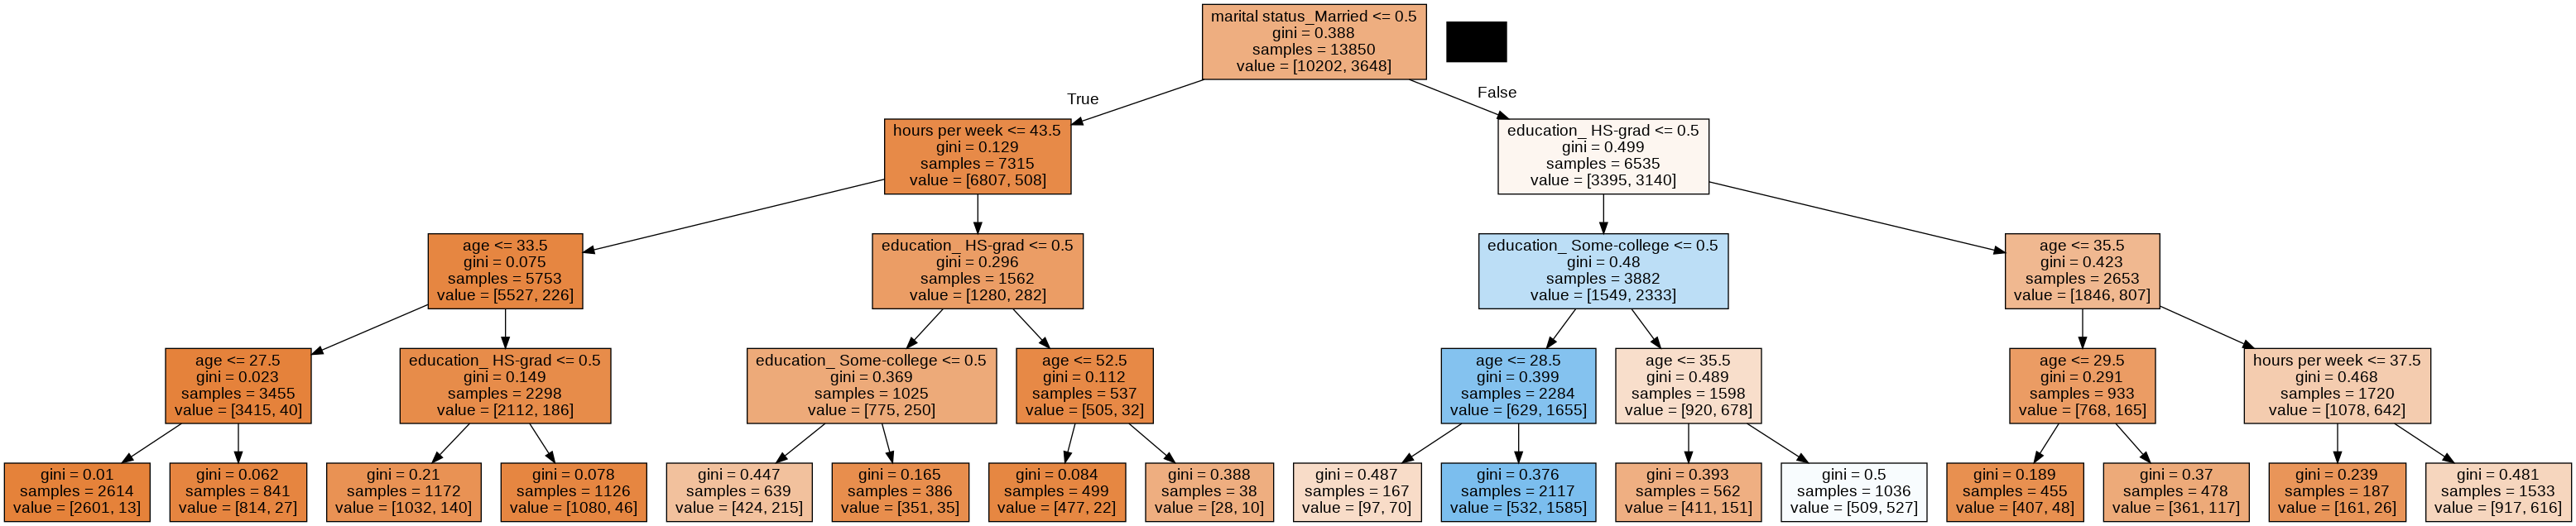

In [ ]:
#Display the classification tree
from IPython.display import Image
import pydotplus


dot_data = tree.export_graphviz(income_classifier, out_file = None, feature_names= X_train.columns, filled= True)
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
Y_predict_test = income_classifier.predict(X_test)
Y_predict_train = income_classifier.predict(X_train)

score = income_classifier.score(X_test, Y_test)    #NOTE: Unlike Linear Regression in which .score returns the R-squared of the model, in the Decision Tree
                                             #            or Logistic Regression classification, .score returns the "Accuracy" of the model according to the confusion matrix.

print('Model Score is:', score)

Model Score is: 0.8143843692100388


In [ ]:
#Evaluation the Simple Decision Tree Model using Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predict_test)
cm

array([[3956,  417],
       [ 685,  879]])

In [ ]:
Accuracy = (3956+879)/(3956+879+685+417)
Accuracy                                       #Compare this to the .score value calculated above ;)

0.8143843692100388

#Step 5- Bagging technique
#Resolves the high varience issue in a general decision tree,
# but created trees might be correlated

In [ ]:
# Decision Tree Bagging Classifie
from sklearn.ensemble import BaggingClassifier

income_classifier = DecisionTreeClassifier()
income_classifier = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, splitter= 'best' ,random_state=1234)

income_bagging_classifier = BaggingClassifier(base_estimator= income_classifier,
                                              n_estimators = 100,  #how many trees you want to create and average at the end? (no need to worry about overfitting!)
                                              bootstrap= True,     #repeated cases could be selected to create samples
                                              n_jobs = -1,         # use full capacity of the processor, if n_jobs=1 then only 1 processor will be used
                                              max_features = 0.9,  #Lets only use 90% of all variables in the decision trees
                                              random_state=1234)
income_bagging_classifier.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=20,
                                                        random_state=1234),
                  max_features=0.9, n_estimators=100, n_jobs=-1,
                  random_state=1234)

In [ ]:
#Look at the default parameters of BaggingClassifier and compare it to 
BaggingClassifier()

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
Y_predict_test = income_bagging_classifier.predict(X_test)
Y_predict_train = income_bagging_classifier.predict(X_train)

score = income_bagging_classifier.score(X_test, Y_test)
print('Model Score is:', score)

Model Score is: 0.810173488293751


In [ ]:
#Evaluation the Bagging Decision Tree Model using Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predict_test)
cm

array([[4069,  304],
       [ 823,  741]])

# Step 6 -Random Forest technique
#compared to Bagging, it resolves the collinearity problem between the created trees

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


income_RF_classifier = RandomForestClassifier(n_estimators = 1000,  #how many trees you want to create and average at the end? (no need to worry about overfitting!)
                                              bootstrap= True,     #repeated cases could be selected to create samples
                                              n_jobs = -1,         # use full capacity of the processor, if n_jobs=1 then only 1 processor will be used
                                              #max_features = 0.6,  #Lets only use 60% of all variables in the decision trees
                                                                   #default max_features is sqrt(number of all features) which is the best number to pick
                                              min_samples_leaf=20, 
                                              max_depth=4, 
                                              random_state=1234)
                                              
income_RF_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [ ]:
#Look at the default parameters of RandomForestClassifier and compare it to 
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_predict = income_RF_classifier.predict(X_test)

score = income_RF_classifier.score(X_test, Y_test)
print('Model Score is:', score)

Model Score is: 0.8051204311942058


In [ ]:
#Evaluation the Random Forest Model using Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predict)
cm

array([[4139,  234],
       [ 923,  641]])

# Step 7 -Gradient Boosting technique (it might overfit)

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier


income_GB_classifier = GradientBoostingClassifier(n_estimators = 1000,  #how many small trees created and added to the main tree. Gradient Boosting (unlike bagging) will overfit if this is too large
                                                  criterion='friedman_mse', 
                                                  learning_rate=0.1, 
                                                  loss='deviance', 
                                                  max_depth=3,            #the depth of the small "boosting" trees
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0, 
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  random_state=1234, 
                                                  subsample=1.0, 
                                                  tol=0.0001,
                                                  validation_fraction=0.1)
                                              
income_GB_classifier.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#Look at the default parameters of GradientBoostingClassifier and compare it to 
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Y_predict = income_GB_classifier.predict(X_test)

score = income_GB_classifier.score(X_test, Y_test)
print('Model Score is:', score)

Model Score is: 0.8182583796530234


In [ ]:
#Evaluation the GradientBoosting Model using Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predict)
cm

array([[3972,  401],
       [ 678,  886]])

# Step 8 -Ada-Boost technique
#is also a boosting technique that increases the importance of an observation that has been misclassified (or in case of regression, if residual is large) 

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier

income_classifier = DecisionTreeClassifier()
income_classifier = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, splitter= 'best' ,random_state=1234)

income_AdaB_classifier = AdaBoostClassifier(base_estimator = income_classifier,
                                            n_estimators = 100,  #how many small trees created and added to the main tree. Gradient Boosting (unlike bagging) will overfit if this is too large
                                            algorithm='SAMME.R', 
                                            learning_rate=0.1, 
                                            random_state=1234)
                                              
income_AdaB_classifier.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=20,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

In [ ]:
#Look at the default parameters of AdaBoostClassifier and compare it to 
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
Y_predict = income_AdaB_classifier.predict(X_test)

score = income_AdaB_classifier.score(X_test, Y_test)
print('Model Score is:', score)

Model Score is: 0.8185952501263264


In [ ]:
#Evaluation the AdaBoostClassifier Model using Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predict)
cm

array([[3990,  383],
       [ 694,  870]])

# Step 9 -XG-Boost technique
#Similar to Ada-Boost, but uses regularization to avoid overfitting


In [ ]:
#Gradient Boosting Classifier
import xgboost as xgb

income_XGB_classifier = xgb.XGBClassifier(n_estimators = 100,  #how many small trees created and added to the main tree. 
                                          learning_rate=0.1, 
                                          booster='gbtree',
                                          algorithm='SAMME.R', 
                                          max_depth=4,
                                          reg_alpha=0,     #regularization parameter 
                                          reg_lambda=1,    #regularization parameter 
                                          seed=1234)
                                              
income_XGB_classifier.fit(X_train, Y_train)

XGBClassifier(algorithm='SAMME.R', base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1234,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Look at the default parameters of XGBClassifier and compare it to 
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Y_predict = income_XGB_classifier.predict(X_test)

score = income_XGB_classifier.score(X_test, Y_test)
print('Model Score is:', score)

Model Score is: 0.8160687215765539


In [ ]:
#Evaluation the XGBClassifier Model using Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predict)
cm

array([[3984,  389],
       [ 703,  861]])